<a href="https://colab.research.google.com/github/pswoo0323/2023.AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EB%8B%A4%ED%95%AD%EC%84%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_us.txt', names=['size', 'n_room', 'price'])
print(data)

X = np.c_[data['size'], data['n_room']]
y = data['price']
m = len(data)

Mounted at /content/drive
    size  n_room   price
0   2104       3  399900
1   1600       3  329900
2   2400       3  369000
3   1416       2  232000
4   3000       4  539900
5   1985       4  299900
6   1534       3  314900
7   1427       3  198999
8   1380       3  212000
9   1494       3  242500
10  1940       4  239999
11  2000       3  347000
12  1890       3  329999
13  4478       5  699900
14  1268       3  259900
15  2300       4  449900
16  1320       2  299900
17  1236       3  199900
18  2609       4  499998
19  3031       4  599000
20  1767       3  252900
21  1888       2  255000
22  1604       3  242900
23  1962       4  259900
24  3890       3  573900
25  1100       3  249900
26  1458       3  464500
27  2526       3  469000
28  2200       3  475000
29  2637       3  299900
30  1839       2  349900
31  1000       1  169900
32  2040       4  314900
33  3137       3  579900
34  1811       4  285900
35  1437       3  249900
36  1239       3  229900
37  2132       4  345000

In [2]:
X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print (X.shape, y.shape)

(47, 2) (47, 1)


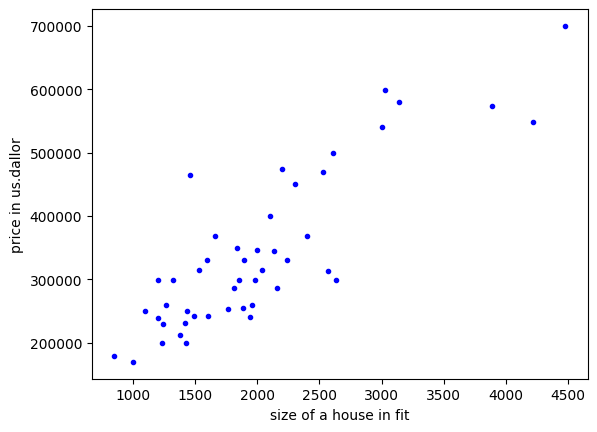

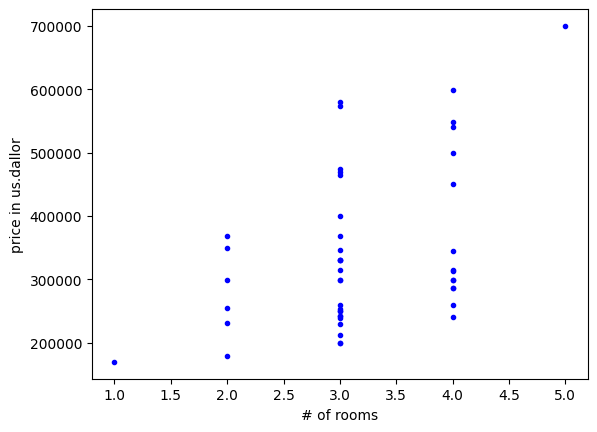

In [3]:
import matplotlib.pyplot as plt
plt.plot(X[:,0].reshape(-1),y,'b.')
plt.xlabel("size of a house in fit")
plt.ylabel("price in us.dallor")
plt.show()

plt.plot(X[:,1].reshape(-1),y,'b.')
plt.xlabel("# of rooms")
plt.ylabel("price in us.dallor")
plt.show()

In [4]:
def featureNomalize(X):
  mu = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  X_norm = (X - mu)/ std
  return X_norm, mu, std

In [5]:
X, mu, std = featureNomalize(X)
print (X.shape)

(47, 2)


In [8]:
X_b = np.c_[np.ones((m,1)),X]

learning_rate = 0.01
max_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

for i in range(max_iter):
  gradients = 2.0/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - learning_rate * gradients
print ("theta")
print (theta)

theta
[[340307.35762792]
 [107757.47917383]
 [ -4888.35822699]]


In [10]:
X_mine = np.array([[890,2]])
X_mine = (X_mine - mu) / std
print (X_mine)

X_mine_b = np.c_[np.ones((1,1)), X_mine]
y_predict = X_mine_b.dot(theta)
print (y_predict,"달러")

[[-1.41271579 -1.5543919 ]]
[[195675.0901038]] 달러


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def ComputeJ(t0, t1, t2, X, y):
  m = len(X)
  X_b = np.c_[np.ones((m,1)),X]
  theta = np.array([t0, t1, t2])

  cost_vector = X_b.dot(theta) - y

  cost_vector = cost_vector.reshape(-1)
  cost2 = np.square(cost_vector)
  cost_sum = np.sum(cost2) / (2*m)

  return cost_sum

In [17]:
X = np.c_[data['size'],data['n_room']]
y = data['price']
m = len(data)

X = (np.array(X)).reshape(m,2)
y = (np.array(y)).reshape(m,1)
print (X.shape, y.shape)

X,mu, std = featureNomalize(X)
print (X.shape)

(47, 2) (47, 1)
(47, 2)


In [19]:
X_b = np.c_[np.ones((m,1)),X]

learning_rate = 0.01
max_iter = 400

theta = np.random.randn(3,1)
gradients = np.zeros((3,1))

itr_arr = []
cost_arr = []
for i in range(max_iter):
  gradients = 2.0/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - learning_rate * gradients

  cost = ComputeJ(theta[0], theta[1], theta[2], X, y)
  cost_arr.append(cost)
  itr_arr.append(i)
print ("theta")
print (theta)

theta
[[340307.35740616]
 [107757.45235987]
 [ -4888.33140658]]


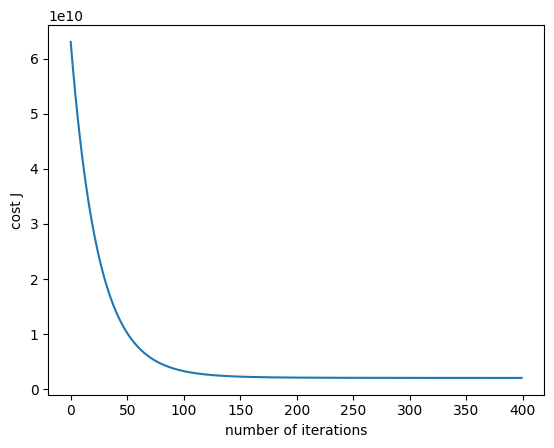

In [21]:
plt.plot(itr_arr, cost_arr)
plt.xlabel("number of iterations")
plt.ylabel("cost J")
plt.show()